In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,NaN,NaN,0.30,2.81,5.68,NaN,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,NaN,3.49,0.24,NaN,7.80,0.86,NaN,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	7
int64		column 5	0
float64		column 6	36
float64		column 7	7
float64		column 8	0
float64		column 9	7
float64		column 10	0
float64		column 11	7
float64		column 12	29
float64		column 13	15


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,178.000000,178.000000,178.000000,171.000000,178.000000,142.000000,171.000000,178.000000,171.000000,178.000000,171.000000,149.000000,163.000000
mean,13.000618,2.336348,2.366517,19.574269,99.741573,2.243310,2.016784,0.361854,1.586667,5.058090,0.957579,2.584295,753.705521
std,0.811827,1.117146,0.274344,3.364911,14.282484,0.623217,0.997629,0.124453,0.578495,2.318286,0.230278,0.718050,319.380901
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.685000,1.150000,0.270000,1.245000,3.220000,0.785000,1.820000,500.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.210000,2.110000,0.340000,1.540000,4.690000,0.960000,2.770000,678.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.735000,2.825000,0.437500,1.950000,6.200000,1.120000,3.170000,987.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

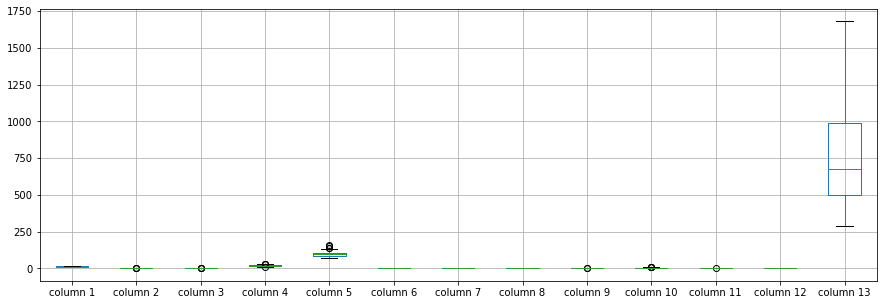

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000618
column 2       2.336348
column 3       2.366517
column 4      19.574269
column 5      99.741573
column 6       2.243310
column 7       2.016784
column 8       0.361854
column 9       1.586667
column 10      5.058090
column 11      0.957579
column 12      2.584295
column 13    753.705521
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.094397,0.211545,-0.301051,0.270798,0.211502,0.239124,-0.155929,0.130028,0.546364,-0.074654,0.040856,0.641896
column 2,0.094397,1.000000,0.164045,0.277986,-0.054575,-0.320880,-0.400731,0.292977,-0.203789,0.248985,-0.565544,-0.371040,-0.220039
column 3,0.211545,0.164045,1.000000,0.461561,0.286587,0.132351,0.102532,0.186230,0.007869,0.258887,-0.075198,0.027812,0.208984
column 4,-0.301051,0.277986,0.461561,1.000000,-0.074045,-0.300736,-0.317850,0.351897,-0.177500,0.032773,-0.264246,-0.259170,-0.457414
column 5,0.270798,-0.054575,0.286587,-0.074045,1.000000,0.218436,0.193921,-0.256294,0.241159,0.199950,0.056761,0.089339,0.380291
column 6,0.211502,-0.320880,0.132351,-0.300736,0.218436,1.000000,0.865109,-0.443865,0.625505,-0.147994,0.478105,0.699958,0.434561
column 7,0.239124,-0.400731,0.102532,-0.317850,0.193921,0.865109,1.000000,-0.535609,0.647977,-0.175781,0.538269,0.792331,0.490242
column 8,-0.155929,0.292977,0.186230,0.351897,-0.256294,-0.443865,-0.535609,1.000000,-0.367655,0.139057,-0.264802,-0.526920,-0.320149
column 9,0.130028,-0.203789,0.007869,-0.177500,0.241159,0.625505,0.647977,-0.367655,1.000000,-0.032286,0.290674,0.547269,0.330226
column 10,0.546364,0.248985,0.258887,0.032773,0.199950,-0.147994,-0.175781,0.139057,-0.032286,1.000000,-0.525534,-0.479370,0.323658


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+54,13+54+54,13+54+54,13+54+54+54+54,13+54+54+54+54+54,13+54+54+54+54+54+54,13+54+54+54+54+54,13+54+54+54+54,13+54+54+54,13+54+54,13+54,13], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 892.7483853426846
Epoch: 1 , loss: 896.4804132634944
Epoch: 2 , loss: 898.510947487571
Epoch: 3 , loss: 895.6997014825994
Epoch: 4 , loss: 901.4242664683949
Epoch: 5 , loss: 889.9372503107244
Epoch: 6 , loss: 901.7925858931108
Epoch: 7 , loss: 901.7619406960227
Epoch: 8 , loss: 895.8507634943181
Epoch: 9 , loss: 894.8344837535511
Epoch: 10 , loss: 902.4255315607244
Epoch: 11 , loss: 897.3937377929688
Epoch: 12 , loss: 897.1060569069602
Epoch: 13 , loss: 896.228193803267
Epoch: 14 , loss: 894.8735906427556
Epoch: 15 , loss: 896.9349587180398
Epoch: 16 , loss: 900.529463334517
Epoch: 17 , loss: 903.0156028053977
Epoch: 18 , loss: 892.5293523615056
Epoch: 19 , loss: 891.9808738014915
Epoch: 20 , loss: 902.3045321377841
Epoch: 21 , loss: 898.2340642755681
Epoch: 22 , loss: 899.1719193892045
Epoch: 23 , loss: 898.4877097389915
Epoch: 24 , loss: 898.6987360174006
Epoch: 25 , loss: 901.4432428533381
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0,-2.745553,-3.185184,0.0,0.000000,0.0,-0.976557,0.000000,0.0
3,0.0,0.0,0.0,0.0,0,-3.797665,0.000000,0.0,-2.126918,0.0,0.000000,-3.396598,0.0
4,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
174,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
175,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
176,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2780.4673375238985, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.25513373362635544

In [18]:
new_df.iloc[66,:]

column 1     13.110000
column 2      1.010000
column 3      1.700000
column 4     15.000000
column 5     78.000000
column 6      0.049547
column 7      3.180000
column 8      0.260000
column 9      2.280000
column 10     5.300000
column 11     1.120000
column 12     0.051113
column 13     0.049256
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.800000,3.060000,0.28,2.290000,5.64,1.040000,3.920000,1065.0
1,13.20,1.78,2.14,11.2,100,2.650000,2.760000,0.26,1.280000,4.38,1.050000,3.400000,1050.0
2,13.16,2.36,2.67,18.6,101,0.054447,0.054816,0.30,2.810000,5.68,0.053443,3.170000,1185.0
3,14.37,1.95,2.50,16.8,113,0.052335,3.490000,0.24,0.053082,7.80,0.860000,0.053402,1480.0
4,13.24,2.59,2.87,21.0,118,2.800000,2.690000,0.39,1.820000,4.32,1.040000,2.930000,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.680000,0.610000,0.52,1.060000,7.70,0.640000,1.740000,740.0
174,13.40,3.91,2.48,23.0,102,1.800000,0.750000,0.43,1.410000,7.30,0.700000,1.560000,750.0
175,13.27,4.28,2.26,20.0,120,1.590000,0.690000,0.43,1.350000,10.20,0.590000,1.560000,835.0
176,13.17,2.59,2.37,20.0,120,1.650000,0.680000,0.53,1.460000,9.30,0.600000,1.620000,840.0


In [20]:
imputations[-1].to_excel("Wine_AL_5(imp).xlsx", index=False, header=False)